In [1]:
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#read the file
df = pd.read_csv('C:\\Users\\kaush\\Desktop\\IIT SRFP\\code\\n50.csv')

#print the head
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,03-01-2012,4675.799805,4773.100098,4675.799805,4765.299805,4765.299805,0.0
1,04-01-2012,4774.950195,4782.850098,4728.850098,4749.649902,4749.649902,0.0
2,05-01-2012,4749.000000,4779.799805,4730.149902,4749.950195,4749.950195,0.0
3,06-01-2012,4724.149902,4794.899902,4686.850098,4754.100098,4754.100098,0.0
4,07-01-2012,NaN,NaN,NaN,NaN,NaN,NaN


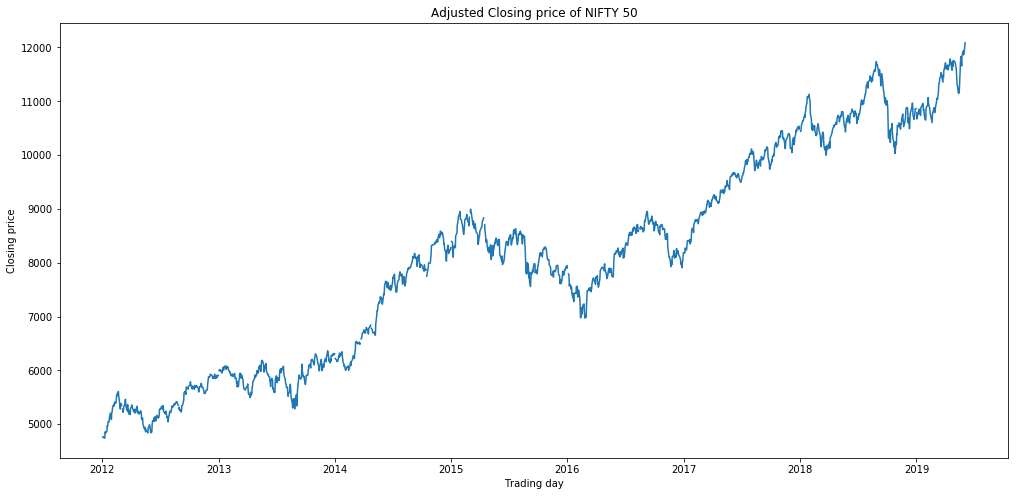

In [2]:
df['Date'] = pd.to_datetime(df.Date,format='%d-%m-%Y')
df.index = df['Date']



plt.figure(figsize=(17, 8))
plt.plot(df['Adj Close'])
plt.title('Adjusted Closing price of NIFTY 50')
plt.ylabel('Closing price')
plt.xlabel('Trading day')
plt.grid(False)
plt.show()

In [3]:
df.dtypes
drop_cols = ['Open','High','Low','Close','Volume']
df.drop(drop_cols, axis=1, inplace=True)
df.head()

df1= df.dropna()
df1.isnull().sum()

train = df1.loc['2012-01-02':'2019-01-01']
test = df1.loc['2019-01-01':'2019-06-01']

test.tail()

,Date,Adj Close
Date,,
2019-05-27,2019-05-27,11924.75000
2019-05-28,2019-05-28,11928.75000
2019-05-29,2019-05-29,11861.09961
2019-05-30,2019-05-30,11945.90039
2019-05-31,2019-05-31,11922.79981


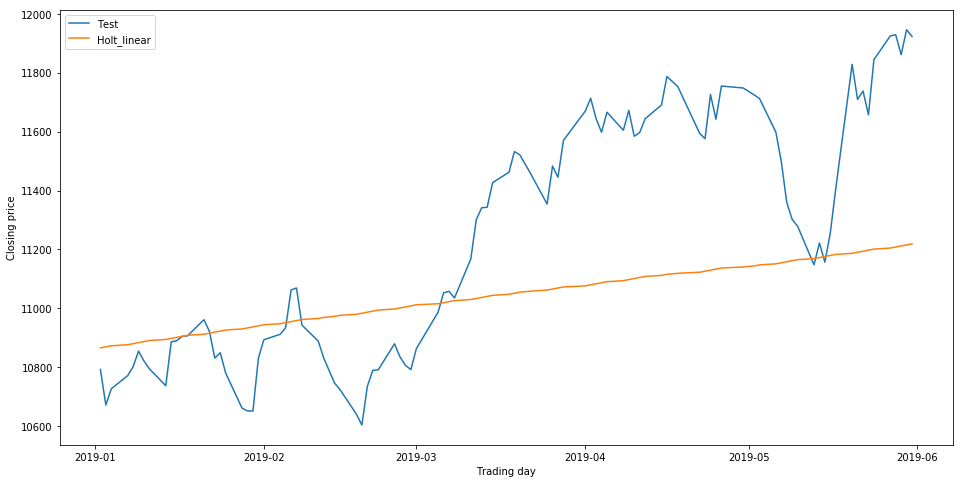

In [5]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test.copy()

fit1 = Holt(np.asarray(train['Adj Close'])).fit()
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(test['Adj Close'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.ylabel('Closing price')
plt.xlabel('Trading day')
plt.show()


In [8]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test['Adj Close'], y_hat_avg.Holt_linear))
print(rms)

376.2111540967901
